In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def utility(A, sigma_A, sigma_N, r):
    return A*sigma_N**2 / sigma_A**2 - r * sigma_N

def sigma0(sigma_A, A, r):
    return (sigma_A**2 / A)*r

Measured mean and standard deviation of colony areas and numbers of colonies for high and low density:

In [3]:
AH = 2.38e5
AL = 5.6e5
sigmaAH = 1.19e5
sigmaAL = 2.52e5
sigmaP = np.arange(0,7e5,100)
NH = 13.36
NL = 5.83

Carrying capacity $K = AN$, for each dilution, $K$ is about the same:

In [4]:
AL * NL

3264800.0

In [5]:
AH * NH

3179680.0

The utility of growth of $N$ cells to the biofilm as a whole is:

\begin{equation}
    u = \mathbb{E}(R) - r \sqrt{N} \sigma_A
\end{equation}

where $\mathbb{E}(R) = K$ is the expected payoff/return, and $r$ is the price of risk.

If colonies act in the interests of the whole biofilm, then growth will occur when the utility $u \ge 0$. There is therefore a critical number of cells $N$ such that growth will occur. This is given by:

\begin{equation}
    K - r \sqrt{N_0} \sigma_A = 0
\end{equation}

\begin{equation}
    N_0 = \left(\frac{K}{r \sigma_A}\right)^2
\end{equation}

Thus $N_0$ depends on the biofilm price of risk (risk preference). Plot this relation:

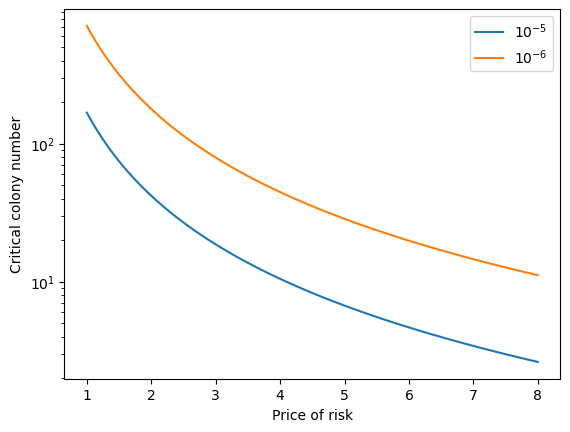

In [6]:
r = np.linspace(1, 8, 100)
N0H = (AH * NH / r / sigmaAH)**2
N0L = (AL * NL / r / sigmaAL)**2
plt.plot(r, N0L)
plt.plot(r, N0H)
plt.legend(['$10^{-5}$', '$10^{-6}$'])
plt.xlabel('Price of risk')
plt.ylabel('Critical colony number')
plt.yscale('log')

The price of risk inferred by the growth decision in each dilution is given by:

\begin{equation}
    r = \frac{K}{\sqrt{N}\sigma_A}
\end{equation}

In [7]:
rL = AL * np.sqrt(NL) / sigmaAL # note K = AN
rH = AH * np.sqrt(NH) / sigmaAH # note K = AN
rL,rH

(5.365642874510948, 7.310266752998826)

The price of risk is approximately the same in each dilution. Plotting the inferred price of risk on the graph:

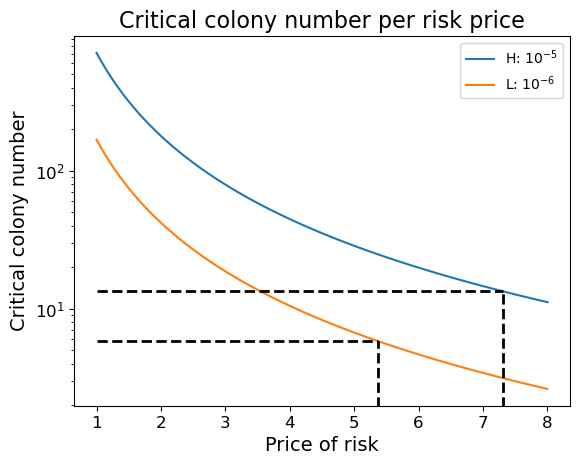

In [8]:
plt.plot(r, N0H)
plt.plot(r, N0L)
plt.hlines([NL,NH], [1,1], [rL,rH], 'k', linestyles='dashed', linewidth=2)
plt.vlines([rL,rH], [0,0], [NL,NH], 'k', linestyles='dashed', linewidth=2)
plt.legend(['H: $10^{-5}$', 'L: $10^{-6}$'], fontsize=10)
plt.xlabel('Price of risk', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Critical colony number', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Critical colony number per risk price', fontsize=16)
plt.yscale('log')
plt.savefig('colonynumber_vs_pricerisk.png',dpi=300)
plt.show()

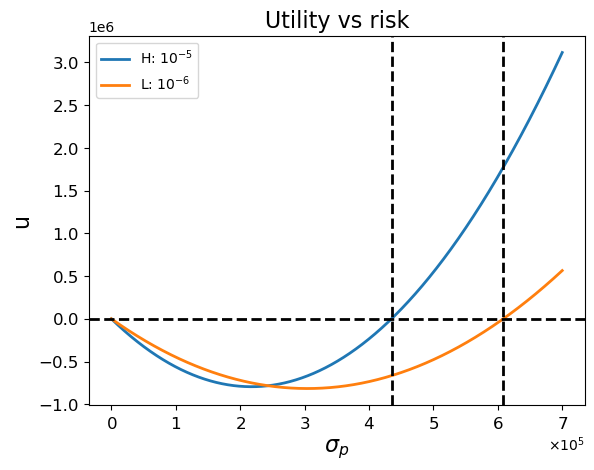

In [9]:
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.plot(sigmaP, utility(AH, sigmaAH, sigmaP, rH), label='H: $10^{-5}$', linewidth=2)
plt.plot(sigmaP, utility(AL, sigmaAL, sigmaP, rL), label='L: $10^{-6}$', linewidth=2)
sigma0H = sigma0(sigmaAH, AH, rH)
sigma0L = sigma0(sigmaAL, AL, rL)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.axvline(x=sigma0H, color='black', linestyle='--', linewidth=2)
plt.axvline(x=sigma0L, color='black', linestyle='--', linewidth=2)
plt.xlabel('$\sigma_p$', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('u', fontsize=16)
plt.yticks(fontsize=12)
plt.title('Utility vs risk', fontsize=16)
plt.legend(fontsize=10)
plt.savefig('utility_vs_risk.png', dpi=300)
plt.show()

#### Average area per pad

In [3]:
exp_sum = pd.read_excel('../Exps_summary.xlsx')
positions = pd.read_excel('../Positions.xlsx')

df = pd.read_excel('../data_processed.xlsx')
exp_sum['formatted_dates'] = exp_sum['Date'].dt.strftime('%Y_%m_%d')

grouped_df = positions.groupby(['Date', 'Machine', 'Pad'])['colonies'].sum().reset_index()
grouped_df.rename(columns={'colonies': 'total_colonies'}, inplace=True)
"""
agg_colony_area_df = df.groupby(['Date', 'Machine', 'Pad'])['area_max_um'].agg(['mean', 'std']).reset_index()
agg_colony_area_df.rename(columns={'mean': 'mean_colony_area', 'std': 'std_colony_area'}, inplace=True)

merged_df = pd.merge(grouped_df, agg_colony_area_df, on=['Date', 'Machine', 'Pad'], how='inner')
merged_df
"""
# Group by 'Date', 'Machine', and 'Pad' and calculate mean, std, and count of 'area_max_um'
agg_colony_area_df = df.groupby(['Date', 'Machine', 'Pad'])['area_max_um'].agg(['mean', 'std', 'count']).reset_index()

# Rename the columns for clarity
agg_colony_area_df.rename(columns={'mean': 'mean_colony_area', 'std': 'std_colony_area', 'count': 'num_colonies'}, inplace=True)

# Merge the grouped data from 'positions' and the aggregated colony area data from 'df'
merged_df = pd.merge(grouped_df, agg_colony_area_df, on=['Date', 'Machine', 'Pad'], how='inner')

# Display the merged dataframe
merged_df

,Date,Machine,Pad,total_colonies,mean_colony_area,std_colony_area,num_colonies
0,2023-11-15,Ti scope,1,19.0,1.274945e+05,21643.298316,7
1,2023-11-15,Ti scope,2,23.0,4.672517e+04,15593.763903,2
2,2023-11-15,Tweez scope,1,3.0,7.684826e+05,99168.204670,2
3,2023-11-15,Tweez scope,2,1.0,4.760315e+05,NaN,1
4,2023-11-17,Ti scope,1,6.0,3.668106e+05,47734.937249,6
5,2023-11-17,Tweez scope,1,3.0,9.387205e+05,NaN,1
6,2023-11-17,Tweez scope,2,1.0,6.881031e+05,NaN,1
7,2023-11-28,Ti scope,1,5.0,7.854782e+05,NaN,1
8,2023-11-28,Ti scope,2,2.0,1.056034e+06,62477.978681,2
9,2023-11-28,Tweez scope,1,14.0,3.800202e+05,139119.174347,11


In [4]:
merged_df.to_excel('dffull.xlsx', index=False)

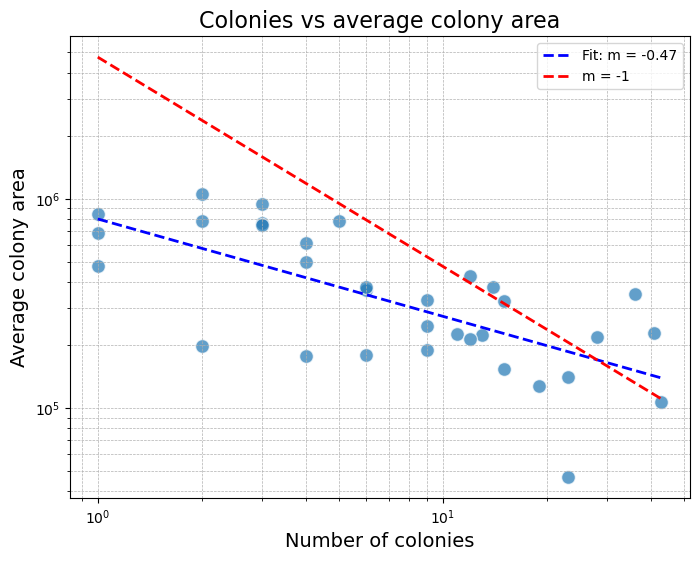

In [27]:
plt.figure(figsize=(8, 6)) 
plt.scatter(merged_df['total_colonies'], merged_df['mean_colony_area'], alpha=0.7, edgecolors='w', s=100)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of colonies', fontsize=14)
plt.ylabel('Average colony area', fontsize=14)
plt.title('Colonies vs average colony area', fontsize=16)

plt.grid(True, which="both", ls="--", linewidth=0.5)

log_x = np.log10(merged_df['total_colonies'])
log_y = np.log10(merged_df['mean_colony_area'])

m, b = np.polyfit(log_x, log_y, 1)

x_vals = np.linspace(merged_df['total_colonies'].min(), merged_df['total_colonies'].max(), 100)
y_vals_fit = 10**(m * np.log10(x_vals) + b)

plt.plot(x_vals, y_vals_fit, color='blue', linestyle='--', linewidth=2, label=f'Fit: m = {m:.2f}')

constant = merged_df['mean_colony_area'].mean() * merged_df['total_colonies'].mean()
y_vals_slope_neg1 = constant / x_vals

plt.plot(x_vals, y_vals_slope_neg1, color='red', linestyle='--', linewidth=2, label='m = -1')
plt.legend()
plt.show()

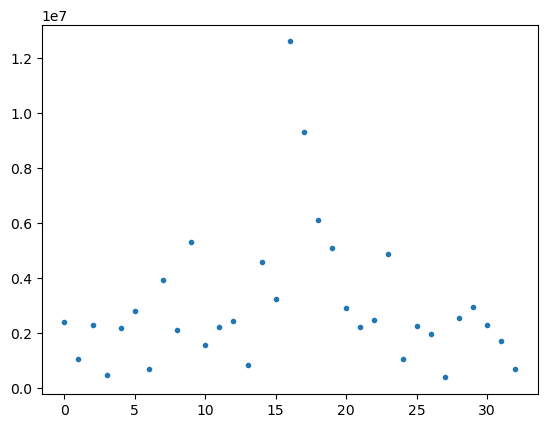

In [29]:
plt.plot(merged_df['total_colonies']*merged_df['mean_colony_area'],'.')

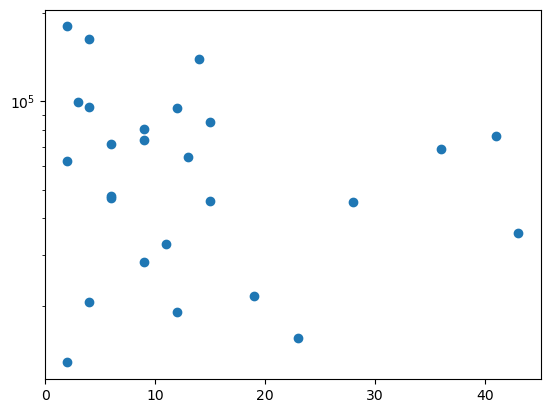

In [31]:
plt.scatter(merged_df['total_colonies'], merged_df['std_colony_area'])
#plt.xscale('log')
plt.yscale('log')